In [41]:
import numpy as np
np.random.seed(42)
X= np.linspace(-np.pi, np.pi, 100)
y = np.sin(X) + np.random.randn(100)  # 노이즈 추가


In [42]:
# 가중치 초기값
a,b,c,d = 0. , 0. , 0. , 0.
eta = 1e-3 #learning rate
epochs = 2000


In [43]:
# 학습과정 기록 손실값, 파라메터의 값
mse_history = np.zeros(epochs)
parameter_history = np.zeros((epochs, 4))


모델의 출력(예측) y_hat = ax** + bx**2 + bx +d 오차 e = y - y_hat 손실함수 mse
np.mean(e^2)

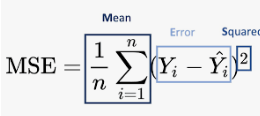

기울기 DL / Dseta(seta - a,b,c,d 중에하나) 손실L 이 y_hat을 통해 seta에 의존 연쇄법칙이 가능

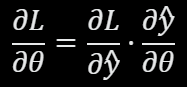

편미분 a로 편미분 x**3

편미분 b로 편미분 x**2

편미분 c로 편미분 x

편미분 c로 편미분 1

기울기 a 2(y-y_hat)x**3

기울기 b 2(y-y_hat)x**2

기울기 c 2(y-y_hat)x

기울기 d 2(y-y_hat)*1

In [44]:
for epoch in range(epochs):
    y_hat = a*X**3 + b*X**2 + c*X + d
    e = y - y_hat

    # mse
    mse = np.mean(e**2)
    mse_history[epoch] = mse

    # gradients
    da = np.mean(-e*X**3)
    db = np.mean(-e*X**2)
    dc = np.mean(-e*X)
    dd = np.mean(-e)

    #update
    a -= eta*da
    b -= eta*db
    c -= eta*dc
    d -= eta*dd

    parameter_history[epoch] = [a,b,c,d]

# 최종결과
print(a,b,c,d,mse)

-0.07889430855766284 0.006841422014060956 0.7321349512896765 -0.0968424760468489 0.8592620939164375


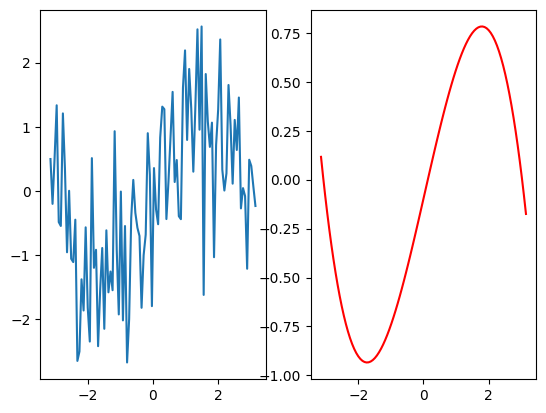

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(X,y,label='data')
plt.subplot(1,2,2)
plt.plot(X,y_hat,label='prediction',color='red')

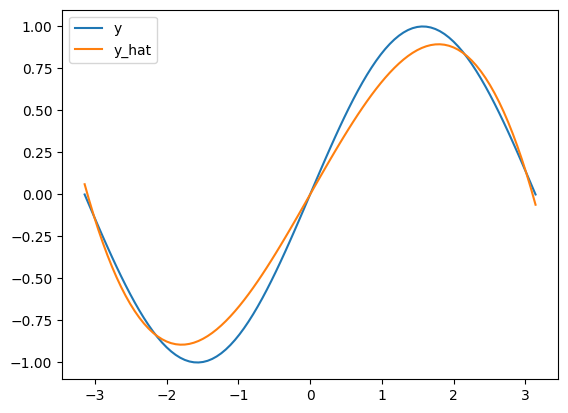

In [1]:
# 텐서로 변경  - 자동미분
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )
for epoch in range(epochs):
    # forward 즉 모델
    y_hat = a*X**3 + b*X**2 + c*X + d
    # 오차
    mse = torch.mean( (y - y_hat)**2  )
    mse.backward()
    mse_history[epoch] = mse.item()
    # 역전파 - 수동
    with torch.no_grad():  # 메모리측면에서 기록을 안한담
        a -= eta*2*a.grad
        b -= eta*2*b.grad
        c -= eta*2*c.grad
        d -= eta*2*d.grad
        # 그레이디언트 초기화
        a.grad.zero_(); b.grad.zero_(); c.grad.zero_(); d.grad.zero_()
    parameter_history[epoch] = [a.item(), b.item(), c.item(), d.item()]

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

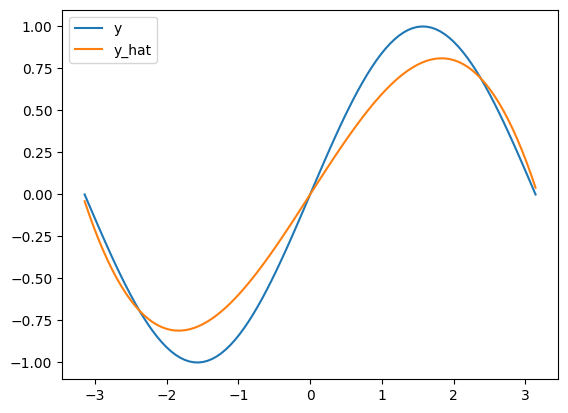

In [7]:
import torch
import numpy as np
from torch.optim import Adam
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )

optimizer = Adam([a,b,c,d], lr=eta)

for epoch in range(epochs):
    # forward 즉 모델
    y_hat = a*X**3 + b*X**2 + c*X + d
    e = y - y_hat
    # 오차
    mse = torch.mean( (e)**2  )
    mse.backward()
    mse_history[epoch] = mse.item()
    # 역전파 - Adam 옵티마이저 사용
    optimizer.step()
    optimizer.zero_grad()
    parameter_history[epoch] = [a.item(), b.item(), c.item(), d.item()]

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()


In [8]:
# Xsetha =  [X^3, X^2, X, 1]
# w = [a, b, c, d]
# y_hat = Xsetha dot w

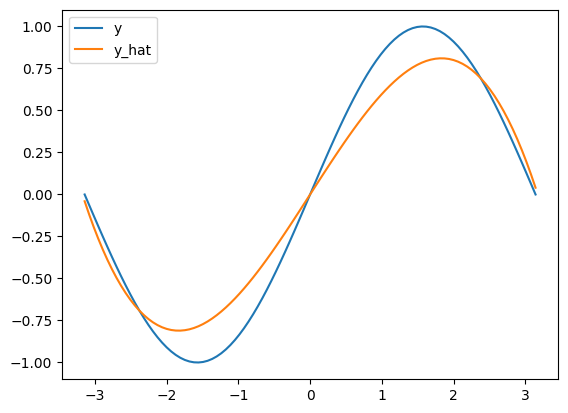

In [21]:

import torch
import numpy as np
from torch.optim import Adam
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )

w = torch.tensor([0.,0.,0.,0.], requires_grad=True)
optimizer = Adam([w], lr=eta)

# 기저함수 행렬(100,4)
Xsetha = torch.stack([X**3, X**2, X, torch.ones_like(X)])

# 손실함수
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    # forward 즉 모델
    y_hat = Xsetha.T @ w
    e = y - y_hat
    # 오차
    mse = torch.mean( (e)**2  )
    mse.backward()
    mse_history[epoch] = mse.item()
    # 가중치 업데이트
    optimizer.step()
    optimizer.zero_grad()
    parameter_history[epoch] = w.detach().numpy()
    

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

In [22]:
# X 텐서이고 100,4 형태로 제공
# 각 차수에 대응하는  가중치를 정해서  --- 토치의 모델을 사용하면 가중치는 우리가 정하지 않고 계산된다
# 내적연산을  해서 예측
# 예측에 대한 오차를 구해 - 손실합수
# 손실함수의 값을 최소화 할수있는 기울기를 계산
# 업데이트해서 다음 계산에 업데이트된 가중치를 사용 - 이 과정을 epochs 만큼 반복

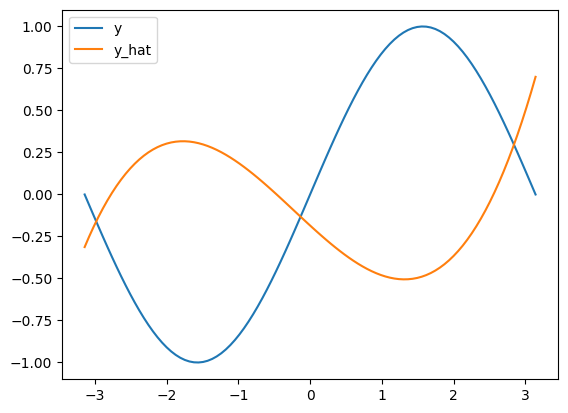

In [25]:
import torch.nn as nn

import torch
import numpy as np
from torch.optim import Adam
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )

# 기저함수 행렬(100,4)
Xsetha = torch.stack([X**3, X**2, X, torch.ones_like(X)])
model = nn.Linear(4,1, bias=True)  # 입력4 출력1
optimizer = Adam(model.parameters(), lr=eta)

# 손실함수
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    # forward 즉 모델
    y_hat = model(Xsetha.T)
    e = y - y_hat
    # 오차
    mse = torch.mean( (e)**2  )
    mse.backward()
    mse_history[epoch] = mse.item()
    # 가중치 업데이트
    optimizer.step()
    optimizer.zero_grad()
    parameter_history[epoch] = w.detach().numpy()
    

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

In [30]:
X = np.array([1,2,3])
a,b = 2,3
print(a*X**3 + b*X**2)


[ 5 28 81]


In [31]:
phi = np.stack([X**3, X**2], axis=1)  # (3,2)
w = np.array([a,b])  # (2,)
phi @ w  # (3,)

array([ 5, 28, 81])